<a href="https://colab.research.google.com/github/mtsilimos/NLP-projects/blob/main/2_Keras_for_researchers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

In [3]:
#(input: 784-dimensional vectors)

#[Dense (64 units, relu activation)]

#[Dense (64 units, relu activation)]

#[Dense (10 units, softmax activation)]

#(output: logits of a probability distribution over 10 classes)
#This is a basic graph with three layers. To build this model using the functional API, start by creating an input node

In [4]:
inputs = keras.Input(shape=(784,))

In [5]:
#The shape of the data is set as a 784-dimensional vector
#The None in the shape tuple represents the batch size. This means that the model can take input with any batch size

inputs.shape

TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

In [8]:
#You create a new node in the graph of layers by calling a layer on this inputs object
#The "layer call" action is like drawing an arrow from "inputs" to this layer you created.
#You're "passing" the inputs to the dense layer, and you get x as the output.
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x.shape

TensorShape([None, 64])

In [10]:
x = layers.Dense(64, activation="relu")(x)
x.shape


TensorShape([None, 64])

In [12]:
outputs = layers.Dense(10)(x)
outputs.shape

TensorShape([None, 10])

In [14]:
#At this point, you can create a Model by specifying its inputs and outputs in the graph of layers
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


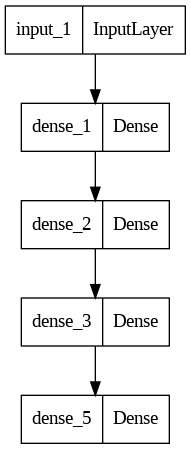

In [15]:
keras.utils.plot_model(model, "my_first_model.png")

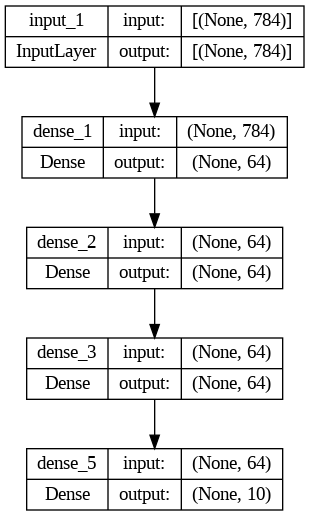

In [16]:
#In the code version, the connection arrows are replaced by the call operation.

#A "graph of layers" is an intuitive mental image for a deep learning model,
and the functional API is a way to create models that closely mirrors this.

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [17]:
#The Model class offers a built-in training loop (the fit() method) and a built-in evaluation loop (the evaluate() method).
#Note that you can easily customize these loops to implement training routines


#fit the model on the data (while monitoring performance on a validation split)
#then evaluate the model on the test data

In [18]:
#load the MNIST image data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [19]:
#reshape the image data into vectors
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [22]:
x_train.shape

(60000, 784)

In [23]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [24]:
#fit the model on the data (while monitoring performance on a validation split)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 8s 4ms/step - loss: 0.3399 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.2010 - val_sparse_categorical_accuracy: 0.9417
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.1278 - val_sparse_categorical_accuracy: 0.9628


In [42]:
#verbose = 0 (silent)
#verbose = 1: a progress bar
# verbose = 2: one line per epoch

test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.1267 - sparse_categorical_accuracy: 0.9603 - 579ms/epoch - 2ms/step
Test loss: 0.12672114372253418
Test accuracy: 0.9603000283241272
